In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [4]:
dmds = pd.read_csv('./diamonds.csv')
dmds.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
17943,17944,1.70,Premium,I,SI2,59.4,59.0,7250,7.83,7.75,4.63
18804,18805,1.51,Good,F,SI2,64.2,61.0,7695,7.24,7.19,4.63
5457,5458,0.63,Ideal,D,IF,61.2,53.0,3832,5.55,5.60,3.41
23351,23352,0.30,Ideal,I,SI1,61.9,57.0,422,4.28,4.31,2.66
28872,28873,0.32,Premium,J,IF,61.2,59.0,684,4.44,4.41,2.71


In [5]:
dmds.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
categorical_cols = ['cut', 'color', 'clarity']
for c in categorical_cols:
    dmds[c] = pd.factorize(dmds[c])[0]
dmds.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,0,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,0,2,56.9,65.0,327,4.05,4.07,2.31


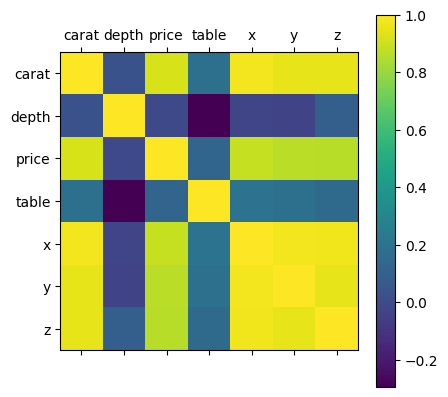

In [7]:
# graphs
# use a reduced set without categorical columns
dmds_reduced = dmds[dmds.columns.difference(['cut', 'color', 'clarity'])]

# correlations
plt.matshow(dmds_reduced.corr())
plt.colorbar()
tick_marks = dmds_reduced.columns.values
plt.xticks(np.arange(tick_marks.size), tick_marks)
plt.yticks(np.arange(tick_marks.size), tick_marks)
plt.show()

In [10]:
# split
from sklearn.model_selection import train_test_split

X, y = dmds.iloc[:, dmds.columns != 'price'].values, dmds.iloc[:, dmds.columns == 'price'].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
# convert price data to classes
n_classes = 10

y_classes = np.linspace(0, y.max(), n_classes)
y_train_cl = np.digitize(y_train, bins=y_classes)
y_test_cl = np.digitize(y_test, bins=y_classes)

print('Price classes: %s' % (y_classes))

Price classes: [    0.          2091.44444444  4182.88888889  6274.33333333
  8365.77777778 10457.22222222 12548.66666667 14640.11111111
 16731.55555556 18823.        ]


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
k_range = range(1,10)
score = {}
scoreList = []
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors=k,p = 2)
    clf.fit(X_train,y_train_cl)
    y_pred = clf.predict(X_test)
    score[k] = accuracy_score(y_pred,y_test_cl)
    scoreList.append(accuracy_score(y_pred,y_test_cl)) 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


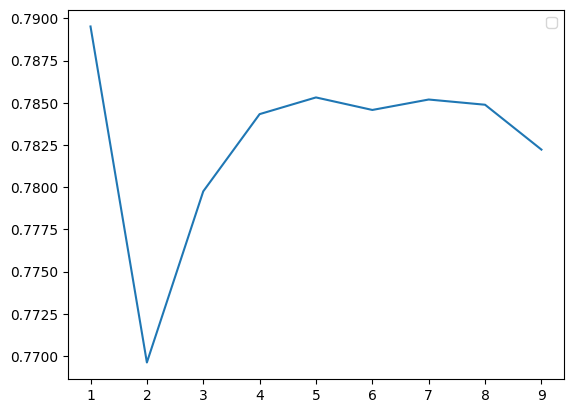

In [19]:
plt.plot(k_range,scoreList)
plt.legend()